<a href="https://colab.research.google.com/github/Derinhelm/treebank_statistics/blob/v2/treebank_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data structure creating

In [1]:
class ConllEntry:
    def __init__(self, id, form, lemma, pos, cpos, feats=None, \
                 parent_id=None, relation=None,deps=None, misc=None):
        self.id = id
        self.form = form
        self.lemma = lemma
        self.pos = pos
        self.cpos = cpos
        self.feats = feats
        self.parent_id = parent_id
        self.relation = relation
        self.deps = deps
        self.misc = misc
        self.root_depth = None

In [2]:
import networkx as nx

class Sentence:
    def __init__(self):
        self.text = ""
        self.sent_id = ""
        self.tokens = []
        self.graph = None


    def add_token(self, token):
        self.tokens.append(token)

    def set_sent_id(self, sent_id):
        self.sent_id = sent_id

    def set_text(self, text):
        self.text = text

    def is_not_empty(self):
        return len(self.tokens) > 0

    def create_graph(self):
      self.graph = nx.DiGraph()
      self.graph.add_node('0', word='root')
      for w in self.tokens:
        self.graph.add_node(w.id, word=w.form)
      for w in self.tokens:
        self.graph.add_edge(w.parent_id, w.id, dep_rel=w.relation)

      for t in self.tokens:
          t.root_depth = nx.shortest_path_length(self.graph, '0', t.id) - 1

# Treebank data getting

In [3]:
import os

def get_treebank_file(path):
    get_command = f"wget -m {path}"
    print(get_command)
    os.system(get_command)
    download_path = "/content/" + path.replace("https://", "")
    itog_path = "/content/" + path.split("/")[-1]
    mv_command = f"mv {download_path} {itog_path}"
    print(mv_command)
    os.system(mv_command)
    return itog_path

In [4]:
def read_conll(filename):
    fh = open(filename,'r',encoding='utf-8')
    sents_read = 0
    sents = []
    comments = set()

    sent = Sentence()
    for line in fh:
        tok = line.strip().split('\t')
        if not tok or line.strip() == '': # empty line, add sentence to list
            if sent.is_not_empty:
                sents_read += 1
                sents.append(sent)
            sent = Sentence()
        else:
            if line[0] == '#' or '-' in tok[0]: # a comment line
                line = line.strip()
                if line[:12] == "# sent_id = ":
                    sent.set_sent_id(line[12:])
                elif line[:9] == "# text = ":
                    sent.set_text(line[9:])
                else:
                    comments.add(line)

            else: # an actual ConllEntry, add to tokens
                if tok[2] == "_":
                    tok[2] = tok[1].lower()

                token = ConllEntry(*tok)
                sent.add_token(token)
    fh.close()
    return sents


In [5]:
treebank_info = { "rus" : "syntagrus"
                 , "ar": "padt"
                 , 'bdt': "bdt"
                 , 'fi': "tdt"
                 , 'he': "htb"
                 , 'hi': "hdtb"
                 , 'it': "isdt"
                 , 'ja': "gsd"
                 , 'ko': "gsd"
                 , 'sv': "talbanken"
                 , 'tr': "imst"
                 , 'eng': "ewt"
                 , 'chi': "gsd"
                 }

In [6]:
treebank_paths = { 'rus': "https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu"
                 , 'ar': "https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu"
                 , 'bdt': "https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu"
                 , 'fi': "https://github.com/UniversalDependencies/UD_Finnish-TDT/raw/refs/heads/master/fi_tdt-ud-test.conllu"
                 , 'he': "https://github.com/UniversalDependencies/UD_Hebrew-HTB/raw/refs/heads/master/he_htb-ud-test.conllu"
                 , 'hi': "https://github.com/UniversalDependencies/UD_Hindi-HDTB/raw/refs/heads/master/hi_hdtb-ud-test.conllu"
                 , 'it': "https://github.com/UniversalDependencies/UD_Italian-ISDT/raw/refs/heads/master/it_isdt-ud-test.conllu"
                 , 'ja': "https://github.com/UniversalDependencies/UD_Japanese-GSD/raw/refs/heads/master/ja_gsd-ud-test.conllu"
                 , 'ko': "https://github.com/UniversalDependencies/UD_Korean-GSD/raw/refs/heads/master/ko_gsd-ud-test.conllu"
                 , 'sv': "https://github.com/UniversalDependencies/UD_Swedish-Talbanken/raw/refs/heads/master/sv_talbanken-ud-test.conllu"
                 , 'tr': "https://github.com/UniversalDependencies/UD_Turkish-IMST/raw/refs/heads/master/tr_imst-ud-test.conllu"
                 , 'eng': "https://github.com/UniversalDependencies/UD_English-EWT/raw/master/en_ewt-ud-test.conllu"
                 , 'chi': "https://github.com/UniversalDependencies/UD_Chinese-GSD/raw/master/zh_gsd-ud-test.conllu"
                 }

In [7]:
treebanks = {}
for treebank_name, test_file in treebank_paths.items():
    itog_path = get_treebank_file(test_file)
    print(test_file)
    treebanks[treebank_name] = read_conll(itog_path)

wget -m https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu
mv /content/github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu /content/ru_syntagrus-ud-test.conllu
https://github.com/UniversalDependencies/UD_Russian-SynTagRus/raw/master/ru_syntagrus-ud-test.conllu
wget -m https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu
mv /content/github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu /content/ar_padt-ud-test.conllu
https://github.com/UniversalDependencies/UD_Arabic-PADT/raw/refs/heads/master/ar_padt-ud-test.conllu
wget -m https://github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu
mv /content/github.com/UniversalDependencies/UD_Basque-BDT/raw/refs/heads/master/eu_bdt-ud-test.conllu /content/eu_bdt-ud-test.conllu
https://github.com/UniversalDependencies/UD_Basque-BDT/raw/r

In [8]:
languages = treebanks.keys()
languages = sorted(list(languages))
print(languages)

['ar', 'bdt', 'chi', 'eng', 'fi', 'he', 'hi', 'it', 'ja', 'ko', 'rus', 'sv', 'tr']


## Ellipsis deleting

An ellipsis sentence contains a technical token whose index includes '.'

Such tokens must be deleted for the research

In [9]:
[(t.id, t.form) for t in treebanks['rus'][3946].tokens]

[('1', 'Почему'), ('1.1', '_'), ('2', 'к'), ('3', 'нему'), ('4', '?')]

In [10]:
def delete_point_tokens(s):
  s.tokens = [t for t in s.tokens if "." not in t.id]
  return s

sents = {}
for lang in languages:
    sents[lang] = [delete_point_tokens(s) for s in treebanks[lang]]

In [11]:
[(t.id, t.form) for t in sents['rus'][3946].tokens]

[('1', 'Почему'), ('2', 'к'), ('3', 'нему'), ('4', '?')]

Creating dependency graphs via networkx


In [12]:
for lang in languages:
    for sent in sents[lang]:
        sent.create_graph()

# Dataset sizes

In [13]:
from collections import Counter
from itertools import groupby

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [14]:
!mkdir /content/imgs

In [15]:
def get_ax(ax, lang_i, x_count, y_count):
    if isinstance(ax[0], np.ndarray):
      x = lang_i // y_count
      y = lang_i % y_count
      return ax[x, y]
    else:
      return ax[lang_i]

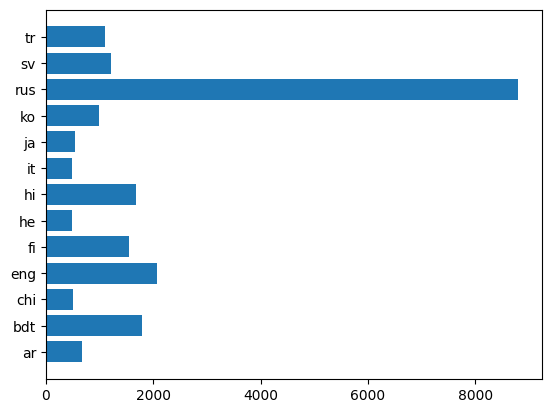

In [16]:
plt.barh(languages, [len(sents[lang]) for lang in languages])
plt.savefig('imgs/dataset_sizes.eps', format='eps', dpi=300)
plt.show()

In [17]:
for lang in languages:
  print(lang, len(sents[lang]))

ar 680
bdt 1799
chi 500
eng 2077
fi 1555
he 491
hi 1684
it 482
ja 543
ko 989
rus 8800
sv 1219
tr 1100


# Количество токенов в предложении

In [18]:
def token_length_group(s):
    if len(s.tokens) >= 50:
      return "50+"
    coeff = len(s.tokens) // 10
    return f"{coeff * 10}-{(coeff + 1) * 10}"

sentence_length_categories = ('0-10', '10-20', '20-30', '30-40', '40-50', '50+')

In [22]:
lengths = {}
for lang in languages:
    lengths[lang] = Counter(map(token_length_group, sents[lang]))

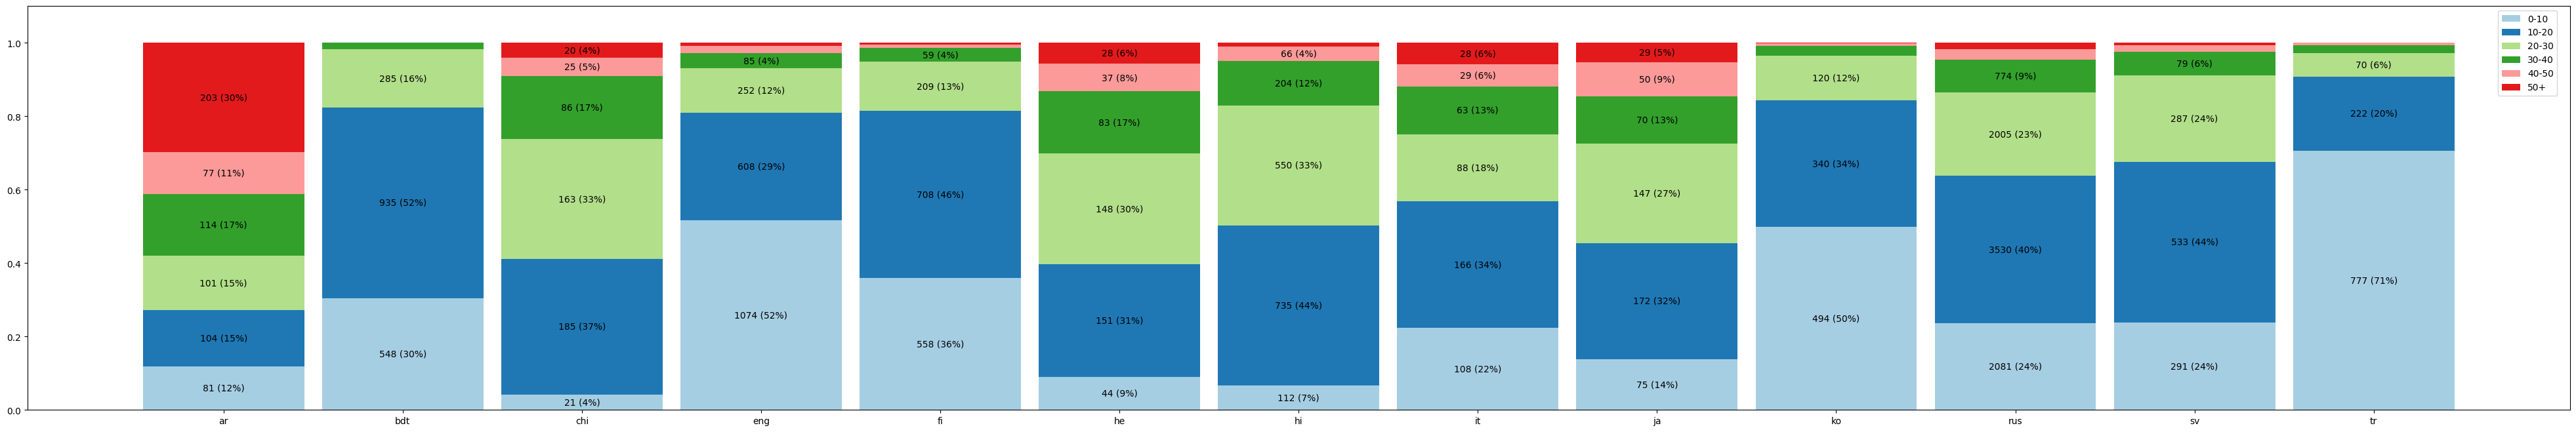

In [57]:
plt.figure(figsize=(50,8))

bottom = np.zeros(len(languages))
width = 0.9
c_dict = {}
all_colors = colormaps['Paired'].colors
for i, c in enumerate(sentence_length_categories):
    c_length = [lengths[lang][c] for lang in languages]
    c_rate_array = np.array([c_length[i] / lengths[lang].total() for i, lang in enumerate(languages)])
    p = plt.bar(languages, c_rate_array, width, bottom=bottom,
                label=c, color = all_colors[i])
    bottom += c_rate_array

    plt.bar_label(p, label_type='center',
                  labels = [f"{c_length[i]:.0f} ({v*100:.0f}%)" if v >= 0.03 else ""
                              for i, v in enumerate(c_rate_array)])
#plt.yaxis.set_visible(False)
plt.ylabel('')
plt.ylim([0, 1.1])
plt.legend(bbox_to_anchor=(0.97, 1), loc='upper left')
plt.savefig('imgs/sentence_length.eps', format='eps', dpi=300)
plt.show()

## Группировка датасетов по токенам

In [25]:
import pandas as pd

In [26]:
def create_node_df(cur_sents):
    info = []
    for sent_i, sent in enumerate(cur_sents):
      for w_i, w in enumerate(sent.tokens):
        info.append((w.id, w.parent_id, w.relation, w.pos, w.form, w.lemma, w.root_depth, sent_i))
    info_df = pd.DataFrame(info, columns=["id", "parent_id", "relation", "pos", "form", "lemma", "root_depth", "sent_i"])
    return info_df

In [27]:
node_df_dict = {}
for lang in languages:
    node_df_dict[lang] = create_node_df(sents[lang])

In [28]:
node_df_dict['rus'].head()

,id,parent_id,relation,pos,form,lemma,root_depth,sent_i
0,1,3,case,ADP,В,в,2,0
1,2,3,amod,ADJ,советский,советский,2,0
2,3,11,obl,NOUN,период,период,1,0
3,4,3,nmod,NOUN,времени,время,2,0
4,5,11,obj,NOUN,число,число,1,0


# Начальная форма

In [29]:
for lang, node_df_lang in node_df_dict.items():
  print(lang, f"{len(set(node_df_dict[lang]['lemma'])) / len(node_df_dict[lang]):.2f}")

ar 0.15
bdt 0.19
chi 0.34
eng 0.18
fi 0.24
he 0.20
hi 0.13
it 0.26
ja 0.25
ko 0.61
rus 0.10
sv 0.17
tr 0.20


rus 0.04

eng 0.07

chi 0.16

# Часть речи

In [30]:
for lang in languages:
  print(lang, len(set(node_df_dict[lang]['pos'])))

ar 16
bdt 17
chi 16
eng 17
fi 15
he 14
hi 15
it 15
ja 16
ko 14
rus 17
sv 17
tr 14


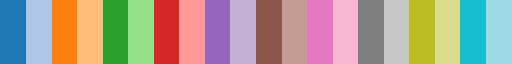

In [31]:
colormaps['tab20']

In [32]:
all_colors = list(colormaps['tab20'].colors[16:] + colormaps['tab20'].colors[:14])

In [33]:
all_colors = all_colors[10:] + all_colors[:10]

In [258]:
pos_border = 0.05

In [259]:
all_pos = set()
for lang in languages:
    all_pos |= set(node_df_dict[lang]['pos'])
all_pos = list(all_pos)
print(f"pos amount:{len(all_pos)}")

pos_colors = {}
for i, pos in enumerate(all_pos):
  pos_colors[pos] = all_colors[i]
pos_colors["OTHER"] = "peachpuff"

pos amount:17


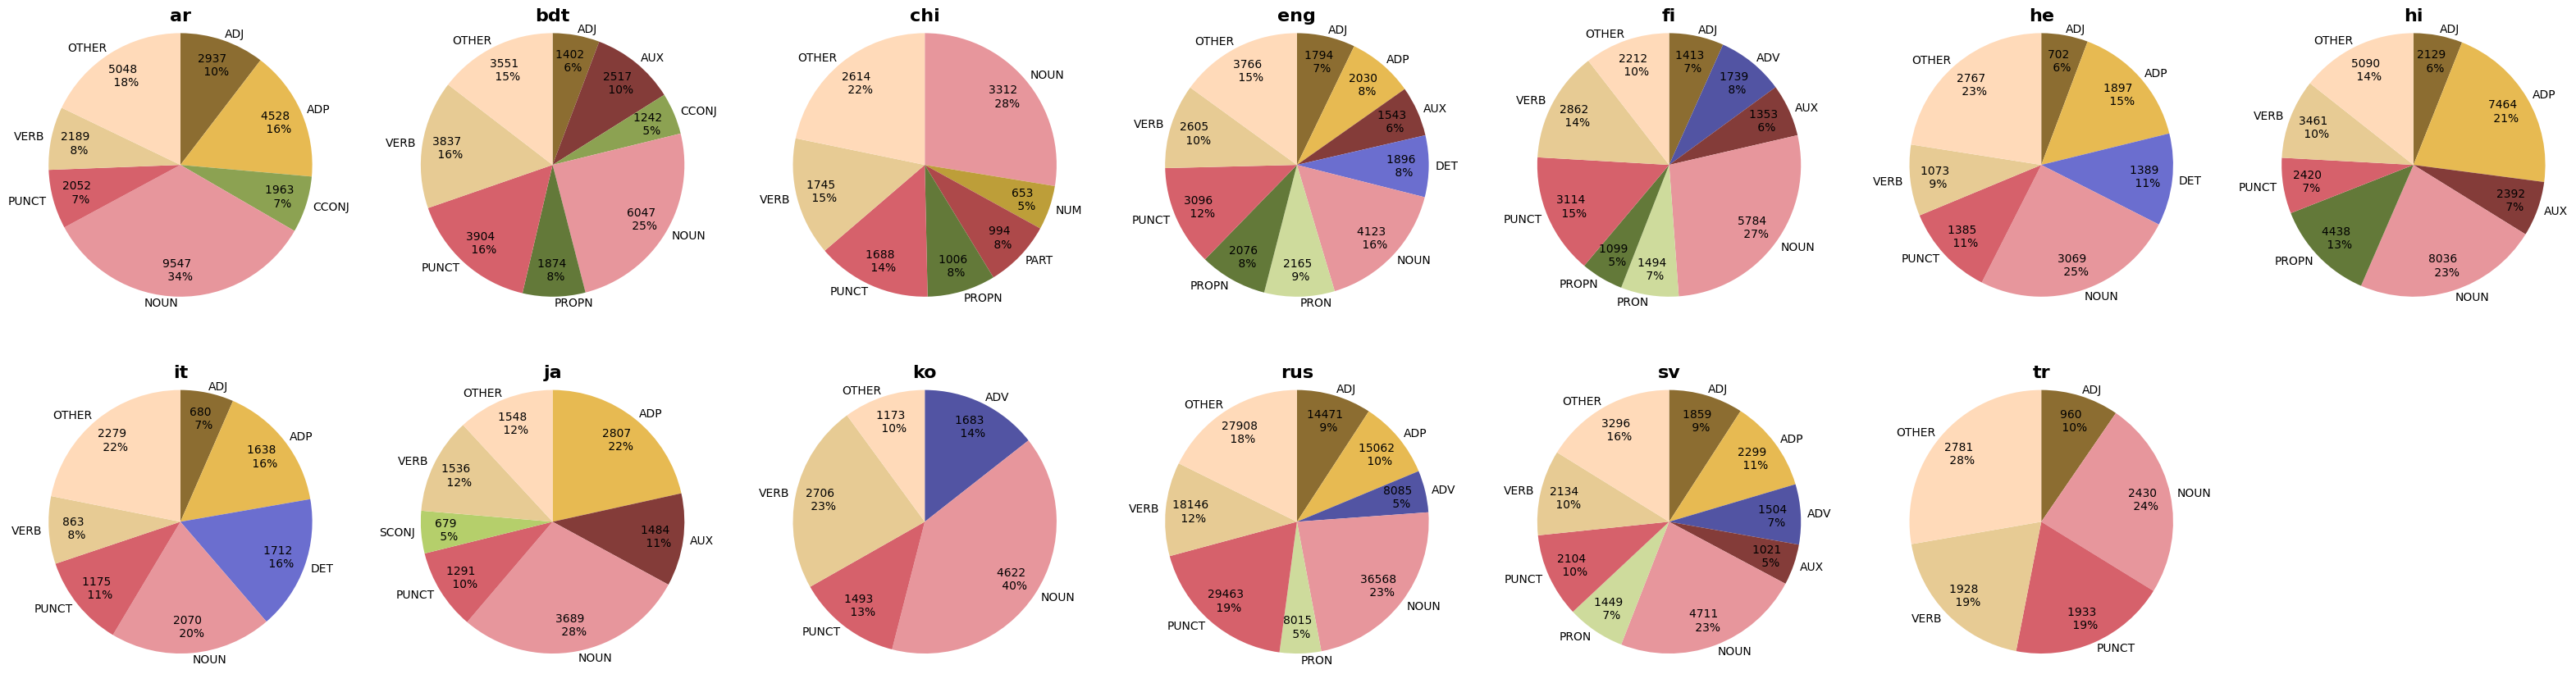

In [260]:
x_count = 2
y_count = 7
f, ax = plt.subplots(x_count, y_count, figsize=(40, 10))
ax[-1, -1].axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    pos_counter = Counter(node_df_dict[lang]['pos'])
    pos_amount = pos_counter.total()
    pos_dict = {}
    other = 0
    for label, value in pos_counter.items():
        if value / pos_amount < pos_border:
            other += value
        else:
            pos_dict[label] = value
    labels = sorted(pos_dict)
    values = [pos_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [pos_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d * pos_amount / 100:.0f} \n {d:.0f}%",
               counterclock=False, startangle=90, labeldistance=1.05,
               colors=colors, radius=1.2, pctdistance=0.8)
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/pos_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


## relation

In [36]:
#all_colors = colormaps['tab20b'].colors[7:] + colormaps['tab20b'].colors[:7]

In [93]:
all_colors = colormaps['tab20b'].colors + colormaps['tab20c'].colors

In [94]:
len(all_colors)

40

In [261]:
relation_border = 0.05

In [262]:
all_rels = set()
for lang in languages:
    pos_counter = Counter(node_df_dict[lang]['relation'])
    all_rels |= {label for (label, value) in pos_counter.items()
                       if value / pos_counter.total() >= relation_border}
all_rels = list(all_rels)
print(f"relation amount with rate >= {relation_border}%:{len(all_rels)}")
rel_colors = {}
for i, relation in enumerate(all_rels):
  rel_colors[relation] = all_colors[i]
rel_colors["OTHER"] = "peachpuff"

relation amount with rate >= 3%:20


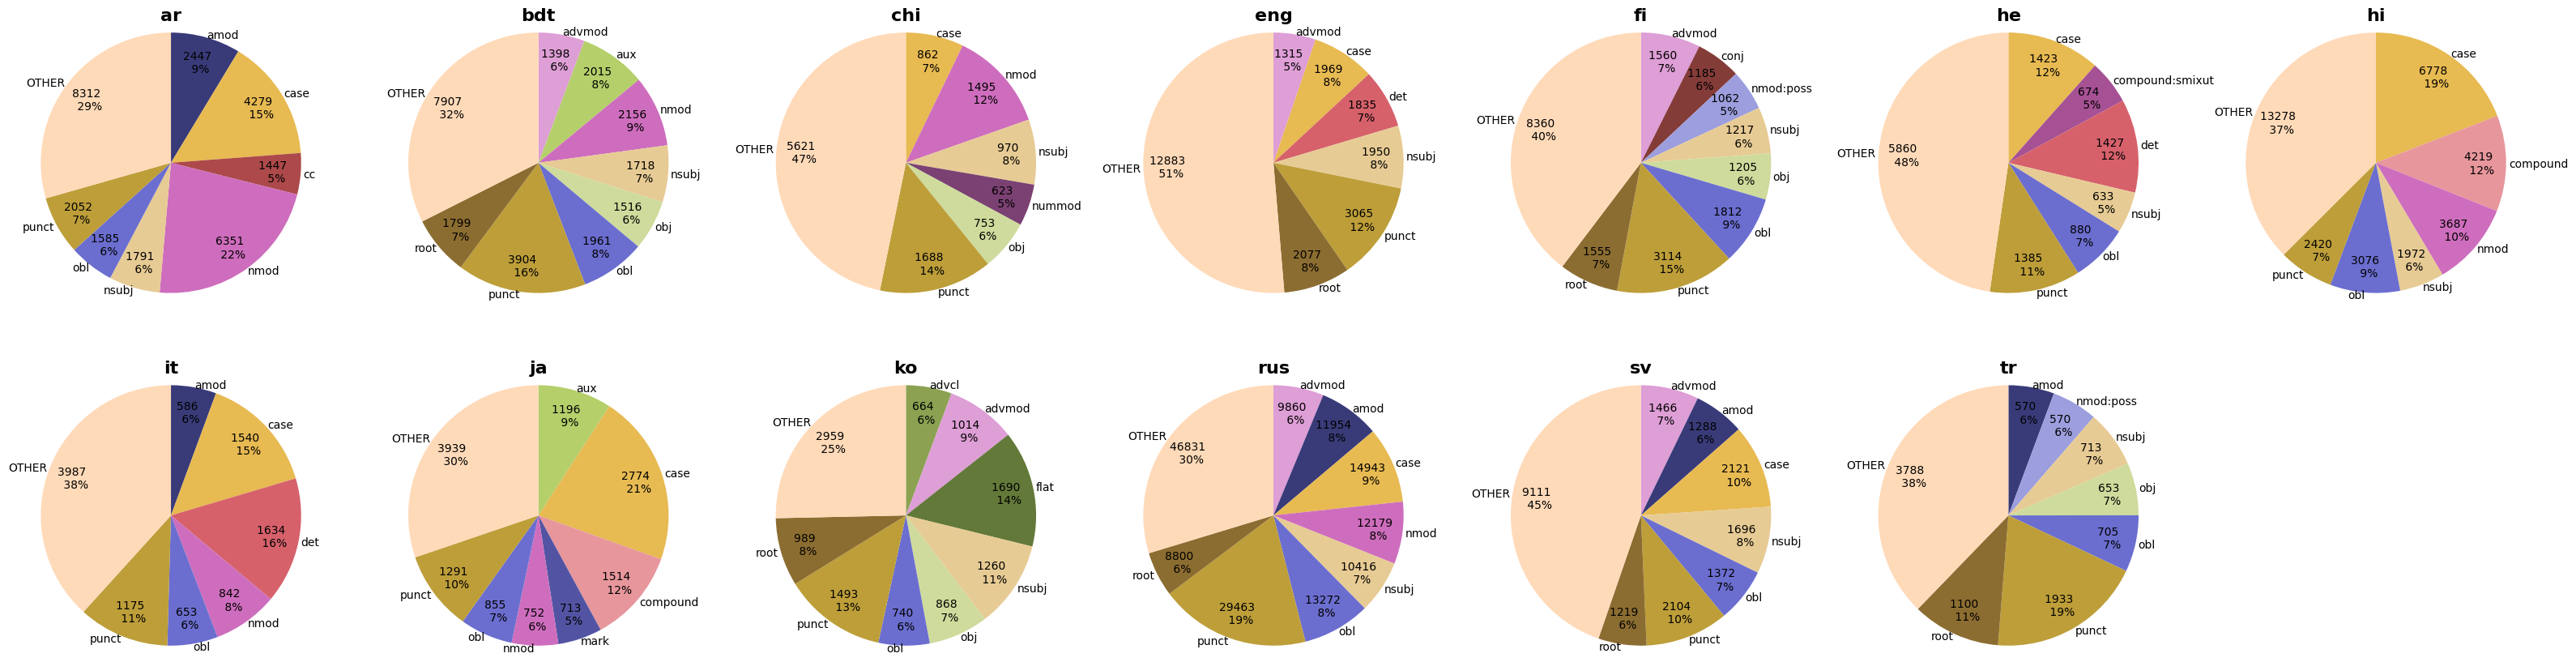

In [263]:
x_count = 2
y_count = 7
f, ax = plt.subplots(x_count, y_count, figsize=(40, 10))

plt.subplots_adjust(wspace=0.2, hspace=0.3)
ax[-1, -1].axis('off')
#ax[-1, -2].axis('off')
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    pos_counter = Counter(node_df_dict[lang]['relation'])
    pos_amount = pos_counter.total()
    relation_dict = {}
    other = 0
    for label, value in pos_counter.items():
        if value / pos_amount < relation_border:
            other += value
        else:
            relation_dict[label] = value
    labels = sorted(relation_dict)
    values = [relation_dict[label] for label in labels]
    labels.append("OTHER")
    values.append(other)
    colors = [rel_colors[label] for label in labels]
    cur_ax.pie(values, labels=labels, autopct=lambda d: f"{d * pos_amount / 100:.0f} \n {d:.0f}%",
               labeldistance=1.02, counterclock=False, startangle=90,
               colors=colors, radius=1.2, pctdistance=0.8)
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/relation_pies.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


# Dependency length

In [41]:
from collections import Counter

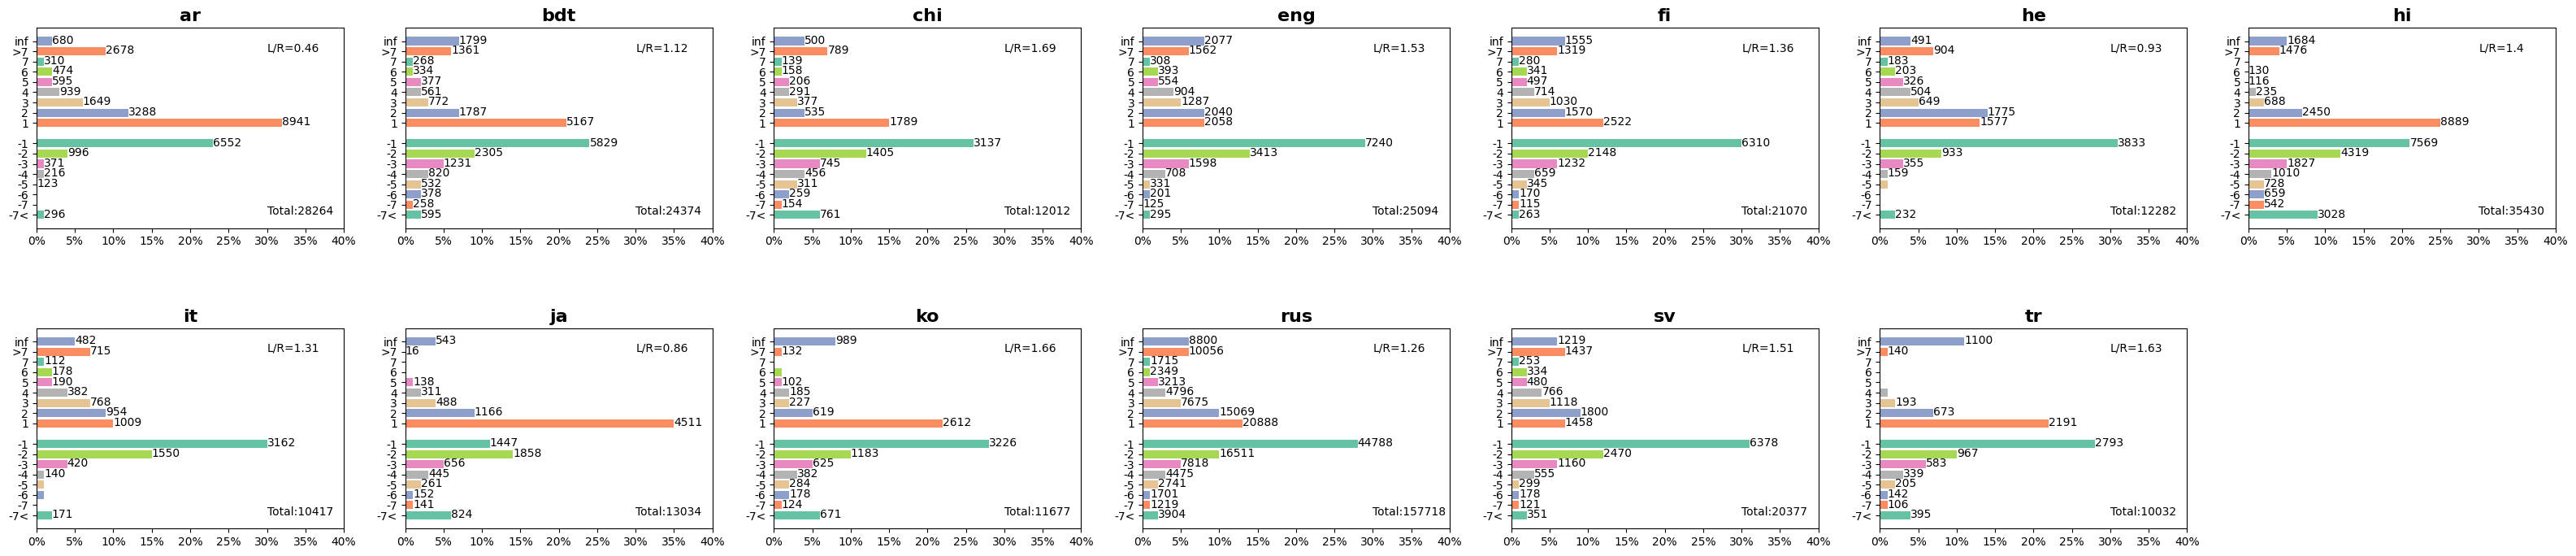

In [247]:
x_count = 2
y_count = 7
f, ax = plt.subplots(x_count, y_count, figsize=(40, 8))
ax[-1, -1].axis('off')
x_values = list(range(0, 45, 5))
plt.setp(ax, xticks=x_values, xticklabels=[f"{x}%" for x in x_values])

border = 7

plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_dep_length = Counter((node_df_dict[lang]['id'].astype('int64') -
                            node_df_dict[lang]['parent_id'].astype('int64').replace(0, float('-inf'))))
    x = list(range(-border, 0)) + list(range(1, border + 1))
    total_lang = lang_dep_length.total()
    dep_lang = [round(lang_dep_length[i] / total_lang * 100, 0) for i in x]
    abs_less = sum(v for (k, v) in lang_dep_length.items() if k < -border)
    less = round(abs_less / total_lang * 100, 0)
    abs_great = sum(v for (k, v) in lang_dep_length.items() if k > border and k != float('inf'))
    great = round(abs_great / total_lang * 100, 0)
    abs_inf = lang_dep_length[float("inf")]
    inf = round(abs_inf / total_lang * 100, 0)
    more_depth = [less] + dep_lang + [great, inf]
    cur_ax.barh([-border - 1] + x + [border + 1, border + 2], more_depth,
                tick_label= [f"-{border}<"] + x + [f">{border}", "inf"], color=colors)
    cur_ax.set_xlim([0, 40])
    l_r = round(((node_df_dict[lang]['id'].astype('int64') < node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum()
          /  ((node_df_dict[lang]['id'].astype('int64') > node_df_dict[lang]['parent_id'].astype('int64')) & (node_df_dict[lang]['parent_id'] != "0")).sum(), 2)
    cur_ax.text(30, border + 1, f"L/R={l_r}")
    cur_ax.text(30, -border - 1, f"Total:{total_lang}")

    cur_ax.text(less, -border - 1.25, str(abs_less))
    cur_ax.text(great, border + 0.75, str(abs_great))
    cur_ax.text(inf, border + 1.75, str(abs_inf))
    for index, value in zip(x, dep_lang):
        if lang_dep_length[index] > 100:
            cur_ax.text(value, index - 0.25, lang_dep_length[index])
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/dependency_length.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()


# Root depth

In [44]:
from collections import Counter

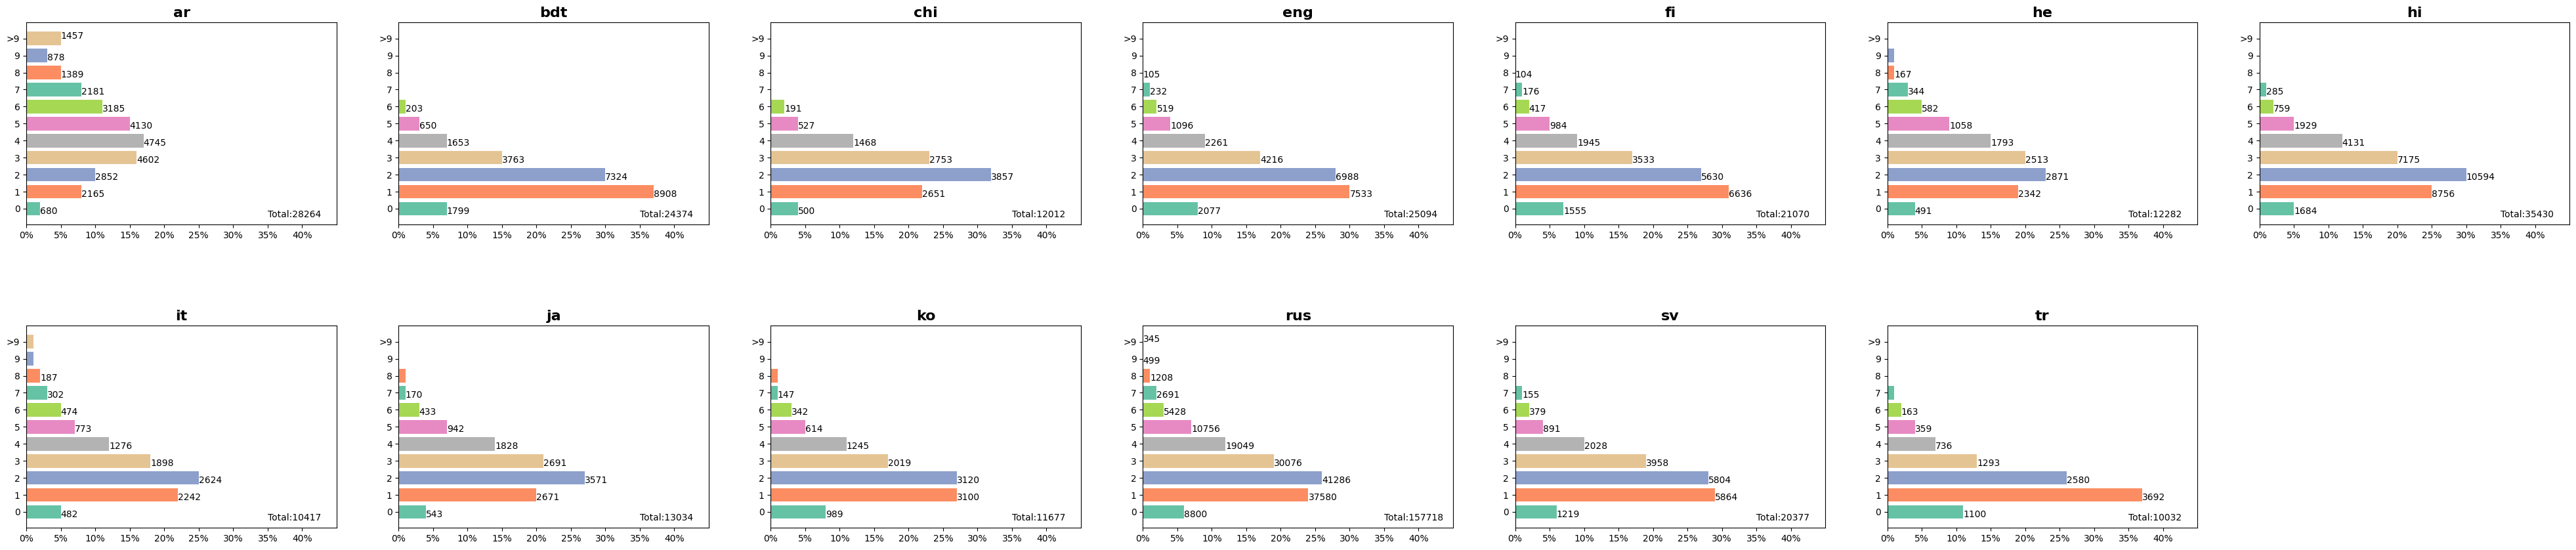

In [252]:
x_count = 2
y_count = 7
f, ax = plt.subplots(x_count, y_count, figsize=(50, 10))
ax[-1, -1].axis('off')
x_values = list(range(0, 45, 5))
plt.setp(ax, xticks=x_values, xticklabels=[f"{x}%" for x in x_values])
border = 9

colors = colormaps["Set2"].colors[:3] + colormaps["Set2"].colors[6:] + colormaps["Set2"].colors[3:5]

plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i, lang in enumerate(languages):
    cur_ax = get_ax(ax, i, x_count, y_count)
    lang_root_depths = Counter(node_df_dict[lang]['root_depth'].astype('int64'))
    x = list(range(0, border + 1))
    total_lang = lang_root_depths.total()
    depth_lang = [round(lang_root_depths[i] / total_lang * 100, 0) for i in x]
    abs_great = sum(v for (k, v) in lang_root_depths.items() if k > border)
    great = round(abs_great / total_lang * 100, 0)
    more_depth = depth_lang + [great]
    cur_ax.barh(x + [border + 1], more_depth, tick_label= x + [f">{border}"], color=colors)
    for index, value in enumerate(more_depth):
        if index != len(more_depth) - 1:
          if lang_root_depths[index] > 100:
            cur_ax.text(value, index - 0.3, f"{lang_root_depths[index]:.0f}")
        else:
          if abs_great > 100:
            cur_ax.text(value, index, f"{abs_great:.0f}")

    cur_ax.text(35, -0.5, f"Total:{total_lang}")

    cur_ax.set_xlim([0, 45])
    cur_ax.set_title(lang, size=16, weight="bold")

plt.savefig('imgs/depth_root.eps', format='eps', dpi=300, bbox_inches='tight')

plt.show()


# Image downloading

In [48]:
!zip -r /content/imgs.zip /content/imgs

  adding: content/imgs/ (stored 0%)
  adding: content/imgs/dataset_sizes.eps (deflated 70%)
  adding: content/imgs/pos_pies.eps (deflated 74%)
  adding: content/imgs/dependency_length.eps (deflated 87%)
  adding: content/imgs/relation_pies.eps (deflated 73%)
  adding: content/imgs/depth_root.eps (deflated 86%)


In [49]:
from google.colab import files
files.download("/content/imgs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>